In [1]:
import struct 
import numpy as np
from sklearn import metrics
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def read_idx(file_name):
    with open(file_name, 'rb') as f:
        zero, data_type, dims = struct.unpack('>HBB', f.read(4))
        shape = tuple(struct.unpack('>I', f.read(4))[0] for d in range(dims))
        return np.fromstring(f.read(), dtype = np.uint8).reshape(shape)

In [3]:
def flat_matrix(matrix, rows_num, col_num):
    return np.reshape(matrix, (rows_num, col_num))

In [4]:
train_data = flat_matrix(read_idx('train-images.idx3-ubyte'), 60000, 28*28)
train_label = read_idx('train-labels.idx1-ubyte')
test_data = flat_matrix(read_idx('t10k-images.idx3-ubyte'), 10000, 28*28)
test_label = read_idx('t10k-labels.idx1-ubyte')

C:\Users\I563567\AppData\Local\Temp\ipykernel_27728\132011618.py:5: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  return np.fromstring(f.read(), dtype = np.uint8).reshape(shape)


In [5]:
#train_mask = ((train_label == 2) | (train_label == 3) | (train_label == 8))
X = train_data/255.0
Y = train_label

In [6]:
#test_mask = ((test_label == 2) | (test_label == 3) | (test_label == 8))
x_test = test_data/255.0
y_true = test_label


In [7]:
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report
from sklearn import svm
from sklearn.metrics import confusion_matrix
svc = svm.SVC(C = 5 , gamma = 0.05).fit(X, Y)


C:\Users\I563567\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


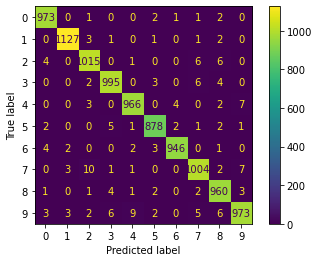

In [9]:
plot_confusion_matrix(svc, x_test, y_true) 
plt.show()

In [10]:
y_pred_res = svc.predict(x_test)
print(classification_report(y_true, y_pred_res, labels=[i for i in range(10)]))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       980
           1       0.99      0.99      0.99      1135
           2       0.98      0.98      0.98      1032
           3       0.98      0.99      0.98      1010
           4       0.98      0.98      0.98       982
           5       0.99      0.98      0.98       892
           6       0.99      0.99      0.99       958
           7       0.98      0.98      0.98      1028
           8       0.97      0.99      0.98       974
           9       0.98      0.96      0.97      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000

